# Clustering Using FBGMM and K-Means

## Preliminary

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

sys.path.append("..")

import segmentalist.kmeans_components
from segmentalist.gaussian_components_fixedvar import FixedVarPrior
from segmentalist.fbgmm import FBGMM
from segmentalist.kmeans_components import KMeansComponents
from segmentalist.kmeans import KMeans
from plot_utils import plot_ellipse, plot_mixture_model

In [3]:
logging.basicConfig(level=logging.INFO)

## Generate data

In [4]:
random.seed(2)
np.random.seed(2)

# Data parameters
D = 2           # dimensions
N = 100         # number of points to generate
K_true = 4      # the true number of components

# Generate data
mu_scale = 4.0
covar_scale = 0.7
z_true = np.random.randint(0, K_true, N)
mu = np.random.randn(D, K_true)*mu_scale
X = mu[:, z_true] + np.random.randn(D, N)*covar_scale
X = X.T

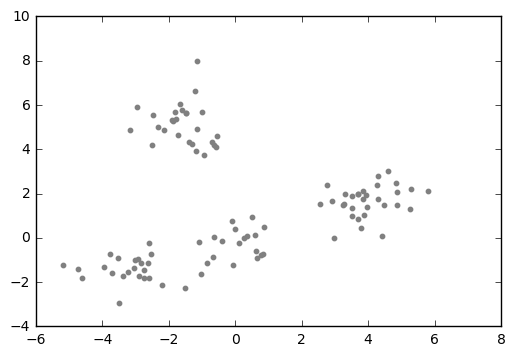

In [5]:
plt.scatter(X[:, 0], X[:, 1], color="gray", s=10)

## FBGMM

In [6]:
# Model parameters
alpha = 1.
K = 4           # number of components
n_iter = 20

# Prior
var_scale = 0.5  # if you make this really small, you basically get k-means
mu_0 = np.zeros(D)
k_0 = covar_scale**2/mu_scale**2
var = covar_scale**2*np.ones(D)*var_scale
var_0 = var/k_0
prior = FixedVarPrior(var, mu_0, var_0)

# Setup FBGMM
fbgmm = FBGMM(X, prior, alpha, K, "rand", covariance_type="fixed")

In [7]:
# Inference
%time record = fbgmm.gibbs_sample(n_iter)

INFO:segmentalist.fbgmm:iteration: 0, anneal_temp: 1, components: 4, log_marg: -692.428422807, log_prob_X_given_z: -552.489364874, log_prob_z: -139.939057932, sample_time: 0.0131509304047
INFO:segmentalist.fbgmm:iteration: 1, anneal_temp: 1, components: 4, log_marg: -637.265652593, log_prob_X_given_z: -493.600368376, log_prob_z: -143.665284217, sample_time: 0.0801351070404
INFO:segmentalist.fbgmm:iteration: 2, anneal_temp: 1, components: 4, log_marg: -507.64571257, log_prob_X_given_z: -363.538511389, log_prob_z: -144.107201181, sample_time: 0.0145409107208
INFO:segmentalist.fbgmm:iteration: 3, anneal_temp: 1, components: 4, log_marg: -439.574417911, log_prob_X_given_z: -294.656395206, log_prob_z: -144.918022706, sample_time: 0.0143620967865
INFO:segmentalist.fbgmm:iteration: 4, anneal_temp: 1, components: 4, log_marg: -439.574417911, log_prob_X_given_z: -294.656395206, log_prob_z: -144.918022706, sample_time: 0.0142011642456
INFO:segmentalist.fbgmm:iteration: 5, anneal_temp: 1, compone

CPU times: user 296 ms, sys: 8 ms, total: 304 ms
Wall time: 365 ms


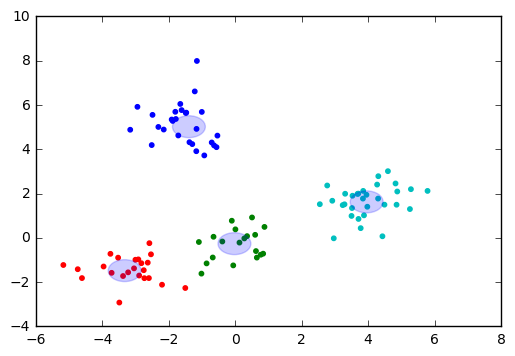

In [8]:
# Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plot_mixture_model(ax, fbgmm)
for k in xrange(fbgmm.components.K):
    mu = fbgmm.components.rand_k(k)
    sigma = np.diag(var)
    plot_ellipse(ax, mu, sigma)

## K-means

In [9]:
# Model parameters
K = 4           # number of components
n_iter = 20

# Setup k-means model
km = KMeans(X, K, "spread")

In [10]:
# Inference
%time record = km.fit(n_iter)

INFO:segmentalist.kmeans:iteration: 0, components: 4, n_mean_updates: 69, sample_time: 0.0029878616333, sum_neg_sqrd_norm: -618.585465615
INFO:segmentalist.kmeans:iteration: 1, components: 4, n_mean_updates: 18, sample_time: 0.00320100784302, sum_neg_sqrd_norm: -223.041596617
INFO:segmentalist.kmeans:iteration: 2, components: 4, n_mean_updates: 1, sample_time: 0.00272488594055, sum_neg_sqrd_norm: -220.219963349
INFO:segmentalist.kmeans:iteration: 3, components: 4, n_mean_updates: 1, sample_time: 0.0028920173645, sum_neg_sqrd_norm: -219.615938349
INFO:segmentalist.kmeans:iteration: 4, components: 4, n_mean_updates: 4, sample_time: 0.00281715393066, sum_neg_sqrd_norm: -207.450606173
INFO:segmentalist.kmeans:iteration: 5, components: 4, n_mean_updates: 11, sample_time: 0.00312399864197, sum_neg_sqrd_norm: -126.321787187
INFO:segmentalist.kmeans:iteration: 6, components: 4, n_mean_updates: 4, sample_time: 0.00304508209229, sum_neg_sqrd_norm: -109.921387903
INFO:segmentalist.kmeans:iteratio

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 27.3 ms


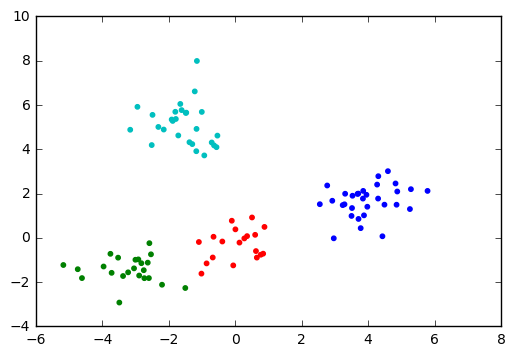

In [11]:
# Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plot_mixture_model(ax, km)